# Project: Analyze Titanic Data Survival Rate


## 1. Introduction

For this project, I will conduct my data analysis on Titanic dataset for exploring the survival situation and finding out what sorts of people were likely to survive and what features of the passengers made people more likely to survive the tragedy.


####  Dataset
According to Kaggle Competition Website, the titanic dataset includes demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. More detailed descriptive summary of the dataset will be elaborating later. 



#### Question
What factors made people more likely to survive? In specific, what kind of variables contribute to a higher survival rate? 


#### Import the Moduls and Read the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# read the file
titanic = pd.read_csv('titanic-data.csv')

## 2. Initial Exploration
- First, let's take a broad overview of the dataset, checking the types and the typical content in data


In [3]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Check the data types
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

###  Variables Description
- PassengerId -- is the ordinal ID for each passenger.
- Survived -- 1 if the passenger survived, and 0 if they did not.
- Pclass -- the passenger's cabin class from 1 to 3 where 1 was the highest class.
- Name -- full name of the passenger.
- Sex -- the passenger's gender, male and female.
- Age -- The passenger's age, in integer format.
- SibSp -- ordinal integer describing the number of siblings or spouses travelling with each passenger.
- Parch -- ordinal integer describing the number of parents or children travelling with each passenger.
- Ticket -- the ticket number, in string format.
- Fare -- the amount the passenger paid for their ticket.
- Cabin -- the cabin number of each passenger.
- Embarked -- Either C, Q, or S, to indicate which port the passenger boarded the ship from.


###  Notes
- It shows that we have two floating point varaibles (Age and Fare), five string features (Name, Sex, Embarked, Ticket, Cabin), and five integer features (PassengerId, Survived, Pclass, SibSp, Parch).
- From the first 10 rows of the table, we can see many of the columns, such as Age and Carbin, having missing values. Thus, we need to deal with the missing data before conducting analysis.


###  Missing Values

In [6]:
# check the count of missing values by columns
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
len(titanic['Age'])

891

- In the dataset, most Cabin numbers are missing, together with 177 Age values and 2 Embarked values.
- The count of missing values plays a vital role in defining the validity of making inferences. Thus, any analysis based on the columns with missing data will either have to be removed from the analysis or need to be highlighted and requires special considerations. 
- In this dataset, the effect values of Age include 714 rows (891/177) and Embarked are 889 rows (891/2) so they could be used in the further analysis after cleaning. However, the Cabin miss lots of data (687/891), this variable makes no sense in any analysis. 

In [8]:
# get the effect values

Age_is_null = pd.isnull(titanic["Age"])
New_Age = titanic['Age'][Age_is_null == False]
print(len(New_Age))

Embarked_is_null = pd.isnull(titanic['Embarked'])
New_Embarked = titanic['Embarked'][Embarked_is_null == False]
print(len(New_Embarked))


714
889


## 3. Analyze by Visualizing Data

- Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
- Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
- PassengerId may be dropped from training dataset as it does not contribute to survival.
- Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.
- We may also add to our assumptions based on the problem description noted earlier.
Women (Sex=female) were more likely to have survived.
Children (Age<?) were more likely to have survived.
The upper-class passengers (Pclass=1) were more likely to have survived.

### (1) Overall Survival Rate

In [8]:
survived_rate=float(titanic['Survived'].sum())/titanic['Survived'].count()  # add the float() to see the exact number
print('The Overall Survived Rate is: ')
print(survived_rate)

The Overall Survived Rate is: 
0.383838383838


In [9]:
def survived_rate(x):
    rate = (titanic.groupby([x]).sum()/titanic.groupby([x]).count())['Survived']
    return rate  

### (2) Sex and Survival Rate

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


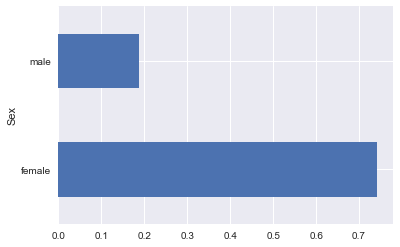

In [10]:
Sex_survived_rate = survived_rate('Sex')
print(Sex_survived_rate)
Sex_survived_rate.plot(kind='barh')

### (3) Pclass and Survival Rate

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


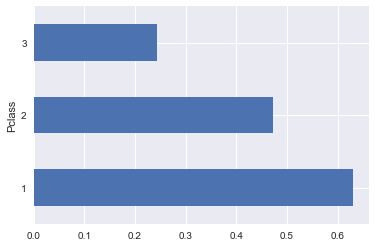

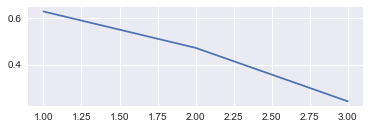

In [11]:
Pclass_survived_rate = survived_rate('Pclass')
print(Pclass_survived_rate)

Pclass_survived_rate.plot(kind='barh')

fig = plt.figure()
ax = fig.add_subplot(2,1,1)  
ax.plot(Pclass_survived_rate)   

### (4) Age and Survival Rate

In [12]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The variables 'Age' here is a tricky one because:
- The data type is float, which is unusual and not necessary. We could convert it to interger for better data visulization.
- The minimum age 0.42 is strange. 
- It involves 177 missing data, which was investigated above.
- Thus, to explore the relationship survived rate and age, 1. delete the missing data 2. convert the datatupe from float to interger 3. create age bands

##### Observations
- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.
- Most passengers are in 15-35 age range.

In [20]:
new_titanic = titanic.dropna(subset = ['Age'])
print(new_titanic.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64


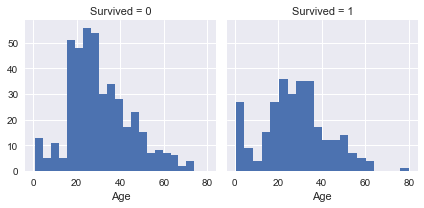

In [21]:
g = sns.FacetGrid(new_titanic, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### (5) SibSp and Survival Rate

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


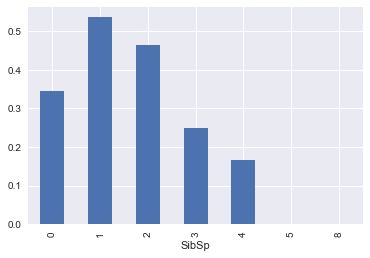

In [22]:
SibSp_Survived_rate = survived_rate('SibSp')
print(SibSp_Survived_rate)
SibSp_Survived_rate.plot(kind='bar')


### (6) Parch and Survival Rate

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


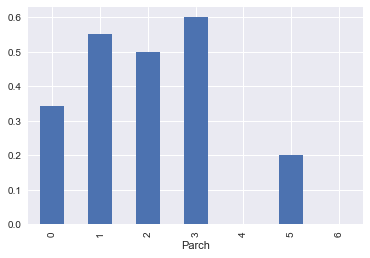

In [23]:
Parch_Survived_rate = survived_rate('Parch')
print(Parch_Survived_rate)
Parch_Survived_rate.plot(kind='bar')

### (7) Embarked and Survival Rate
- C = Cherbourg
- Q = Queenstown
- S = Southampton


Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


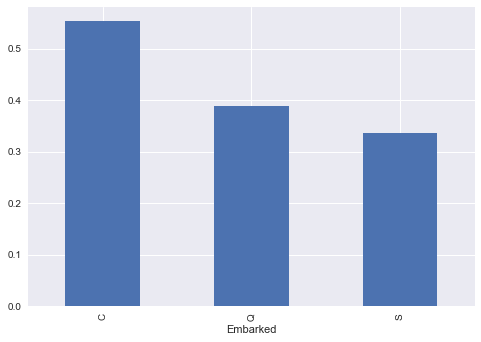

In [29]:
Embarked_Survived_rate = survived_rate('Embarked')
print(Embarked_Survived_rate)
Embarked_Survived_rate.plot(kind='bar')

### (8) Correlation between Variables

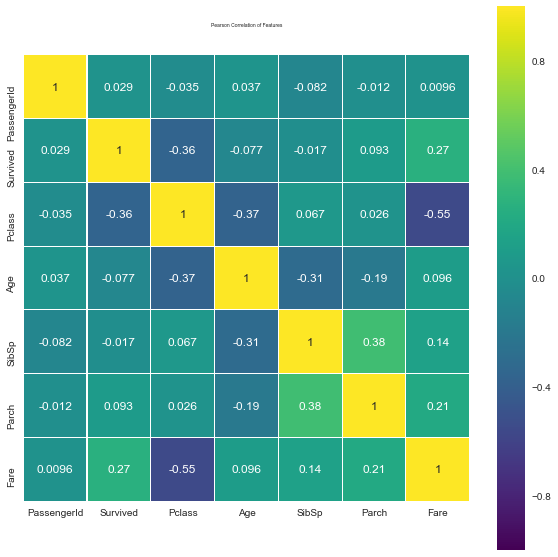

In [30]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=5)
sns.heatmap(new_titanic.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [34]:
# calculate fares by class
passenger_classes = [1, 2, 3]
fares_by_class = {}
for x in passenger_classes:
    pclass_rows = titanic[titanic['Pclass'] == x]
    pclass_fares = pclass_rows['Fare']
    fares_for_class = pclass_fares.mean()
    fares_by_class[x] = fares_for_class
fares_by_class

{1: 84.15468749999992, 2: 20.66218315217391, 3: 13.675550101832997}

In [33]:
#  calculate average age by Pclass
passenger_age = titanic.pivot_table(index='Pclass',values='Age',aggfunc=np.mean)
print(passenger_age)

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [36]:
# calculate fare by embarked 
port_stats = titanic.pivot_table(index='Embarked',values=['Fare'],aggfunc=np.mean)
print(port_stats)

               Fare
Embarked           
C         59.954144
Q         13.276030
S         27.079812


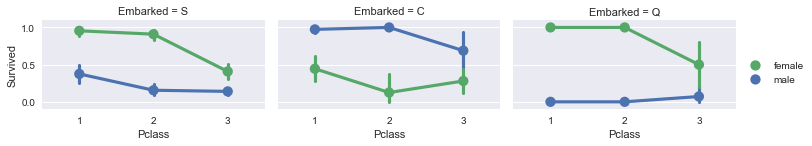

In [41]:
# Embarked / Pclass / Sex
grid = sns.FacetGrid(new_titanic, col='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Pearson Correlation Heatmap
let us generate some correlation plots of the features to see how related one feature is to the next. To do so, we will utilise the Seaborn plotting package which allows us to plot heatmaps very conveniently as follows.
Takeaway from the Plots
One thing that that the Pearson Correlation plot can tell us is that there are not too many features strongly correlated with one another. This is good from a point of view of feeding these features into your learning model because this means that there isn't much redundant or superfluous data in our training set and we are happy that each feature carries with it some unique information. Here are two most correlated features are that of Family size and Parch (Parents and Children). I'll still leave both features in for the purposes of this exercise.

## 4. Conclusion